# Getting started with TensorBoard.dev

TensorBoard.dev是一项免费的公共TensorBoard服务，使您能够上传并与每个人共享您的ML实验。

本 Notebook 训练一个简单的模型，并展示了如何将日志上传到 TensorBoard.dev 预览。

## Setup and imports

本 Notebook 使用 TensorBoard 功能，这些功能仅适用于版本 >= `2.3.0`

In [1]:
import tensorflow as tf
import datetime
from tensorboard.plugins.hparams import api as hp

## Train a simple model and create TensorBoard logs

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

TensorBoard 日志是在训练期间通过将 TensorBoard 和 超参数回调 传递给 Keras 的 `Model.fit()` 来创建的。然后，这些日志可以上传到 TensorBoard.dev。

In [3]:
model = create_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir, {
    'num_relu_units': 512,
    'dropout': 0.2
})

model.fit(
    x=x_train, 
    y=y_train, 
    epochs=5, 
    validation_data=(x_test, y_test), 
    callbacks=[tensorboard_callback, hparams_callback])


Metal device set to: Apple M1


2022-04-19 21:16:11.904868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 21:16:11.906326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-19 21:16:12.011180: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-19 21:16:12.011188: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-19 21:16:12.011231: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-19 21:16:12.675665: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (register

Epoch 1/5
  38/1875 [..............................] - ETA: 7s - loss: 1.1503 - accuracy: 0.6579

2022-04-19 21:16:12.889809: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-19 21:16:12.889818: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-19 21:16:12.895388: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-19 21:16:12.897577: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-19 21:16:12.900842: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20220419-211612/train/plugins/profile/2022_04_19_21_16_12

2022-04-19 21:16:12.901546: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20220419-211612/train/plugins/profile/2022_04_19_21_16_12/Shawns.local.trace.json.gz
2022-04-19 21:16:12.903789: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20220419-211612/train/plugin

1869/1875 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9344

2022-04-19 21:16:20.117634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2203 - accuracy: 0.9345 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0794 - val_accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0671 - accuracy: 0.9787 - val_loss: 0.0697 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0647 - val_accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0646 - val_accuracy: 0.9831


## (Jupyter only) Authorize TensorBoard.dev

**This step is not necessary in Colab**

此步骤要求您在Jupyter之外的shell控制台进行身份验证。在控制台中，执行以下命令。

```
tensorboard dev list
```

作为此流程的一部分，您将获得授权代码。需要此代码才能同意服务条款。

## Upload to TensorBoard.dev

上传 TensorBoard 日志将为您提供一个可以与任何人共享的URL。

上传的TensorBoard是公开的，所以不要上传敏感数据。

当整个日志上传后，上传者将退出。（这是--one_shot标志所指定的。）

In [ ]:
!tensorboard dev upload --logdir ./logs \
  --name "Simple experiment with MNIST" \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

每个上传都有一个唯一的实验ID。这意味着，如果您使用同一目录开始新的上传，您将获得一个新的实验ID。您可以在 [https://tensorboard.dev/experiments/](https://tensorboard.dev/experiments/) 上查看所有上传的实验。或者，您可以使用以下命令在终端中列出您的实验：

```
tensorboard dev list
```

In [ ]:
!tensorboard dev list

## Screenshots of TensorBoard.dev

这就是您导航到 [https://tensorboard.dev/experiments/](https://tensorboard.dev/experiments/) 时的样子：

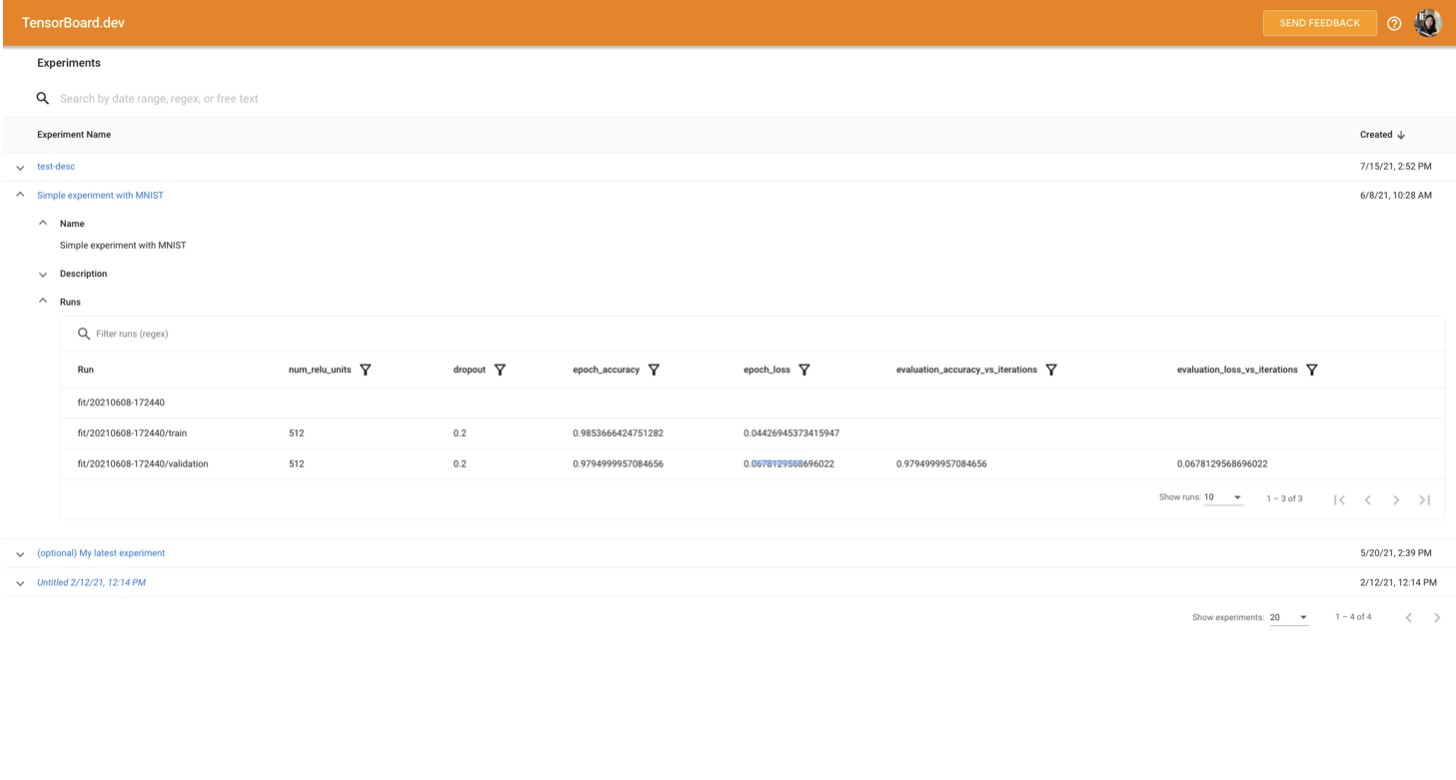

这就是您在TensorBoard.dev上导航到新实验时的样子：

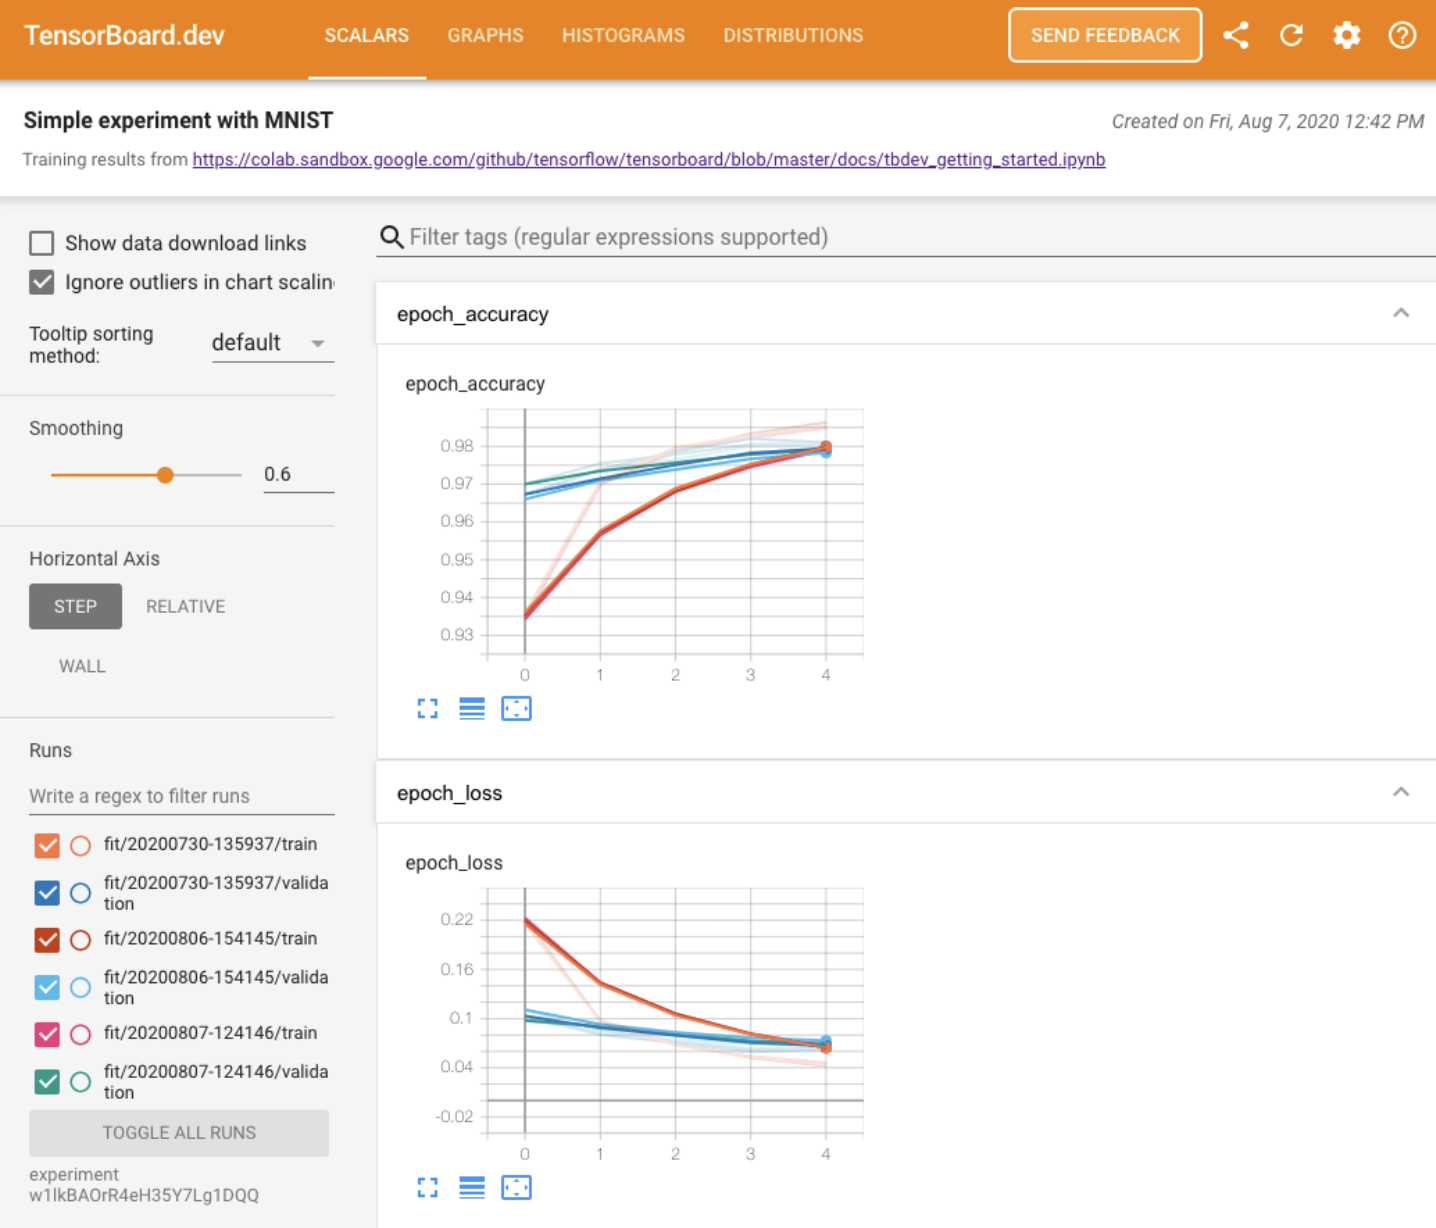


## Deleting your TensorBoard.dev experiment

要删除您上传的实验，请使用 `delete` 命令并指定适当的 `experiment_id`。在上面的屏幕截图中，`experiment_id` 列在左下角：`w1lkBAOrR4eH35Y7Lg1DQQ`。